Training label distribution:
 label
0    17572
1    16580
Name: count, dtype: int64


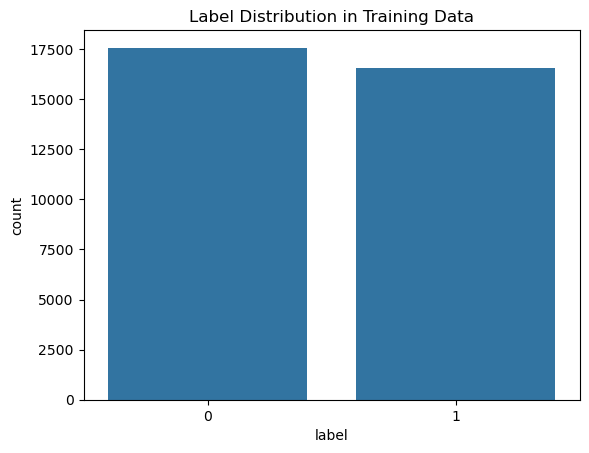

Logistic Regression Cross-Validation Scores: [0.86678378 0.91084761 0.85358712 0.93074671 0.91273792]
Average Accuracy Score: 0.8949406257280723
   label                                               text
0      0  copycat muslim terrorist arrested with assault...
1      0  wow chicago protester caught on camera admits ...
2      1   germany s fdp look to fill schaeuble s big shoes
3      0  mi school sends welcome back packet warning ki...
4      1  u n seeks massive aid boost amid rohingya emer...
5      0  did oprah just leave nasty hillary wishing she...
6      1  france s macron says his job not cool cites ta...
7      0  flashback chilling minutes interview with geor...
8      1  spanish foreign ministry says to expel north k...
9      1  trump says cuba did some bad things aimed at u...


In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Configurations
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Load data
train_df = pd.read_csv("dataset/training_data.csv", sep='\t', names=["label", "text"])
test_df = pd.read_csv("dataset/testing_data.csv", sep='\t', names=["label", "text"])

# Text cleaning function
def clean_text(df, text_col):
    df[text_col] = df[text_col].astype(str).str.lower()
    df[text_col] = df[text_col].apply(lambda x: re.sub(r"[^a-zA-Z]", " ", x))
    df[text_col] = df[text_col].apply(lambda x: re.sub(r"\s+", " ", x).strip())
    return df

train_df = clean_text(train_df, "text")
test_df = clean_text(test_df, "text")

# Exploratory analysis
print("Training label distribution:\n", train_df["label"].value_counts())
sns.countplot(x=train_df["label"])
plt.title("Label Distribution in Training Data")
plt.show()

# TF-IDF vectorization with unigrams and bigrams
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words='english')
X_train = vectorizer.fit_transform(train_df["text"])
y_train = train_df["label"]
X_test = vectorizer.transform(test_df["text"])

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=300)
lr_model.fit(X_train, y_train)

# Cross-validation
lr_scores = cross_val_score(lr_model, X_train, y_train, cv=5)
print("Logistic Regression Cross-Validation Scores:", lr_scores)
print("Average Accuracy Score:", lr_scores.mean())

# Predict labels for test data
predictions = lr_model.predict(X_test)

# Replace '2' in test_df with predictions
test_df["label"] = predictions
final_df = test_df[["label", "text"]]  # drop auxiliary columns if any

# Save to CSV in correct format (tab-separated, no header, no index)
final_df.to_csv("predicted_results.csv", index=False, sep='\t', header=False)

# Preview final result
print(final_df.head(10))
